# 神经网络

## 神经网络模型

ligistic 回归的可视化

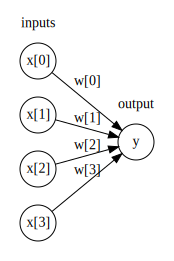

In [18]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

mglearn.plots.plot_logistic_regression_graph()

单隐层的多层感知机

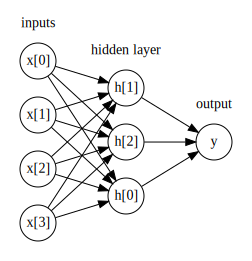

In [9]:
mglearn.plots.plot_single_hidden_layer_graph()

双隐层多层感知机

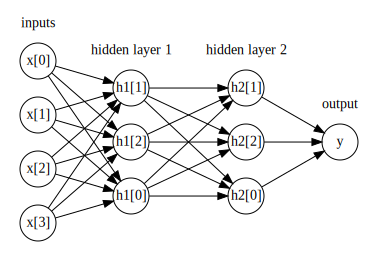

In [11]:
mglearn.plots.plot_two_hidden_layer_graph()

## 激活函数引入

正切双曲线tanh 以及 校正非线性relu

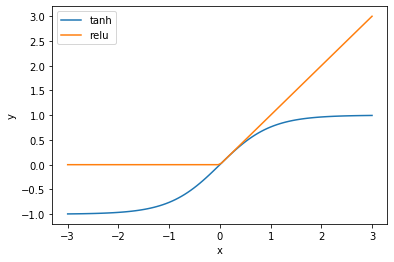

In [17]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label='tanh')
plt.plot(line, np.maximum(line, 0), label='relu')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## MLP分类

### MLP分类数据

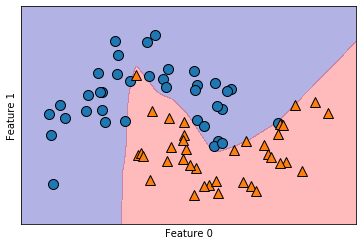

In [31]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# 默认使用100个隐节点
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

plt.show()

使用10个隐层单元，减小模型复杂度

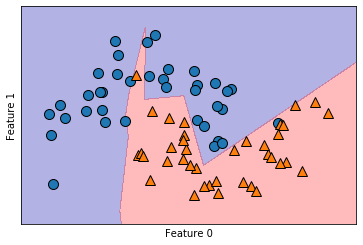

In [36]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10]).fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

plt.show()

使用2隐层

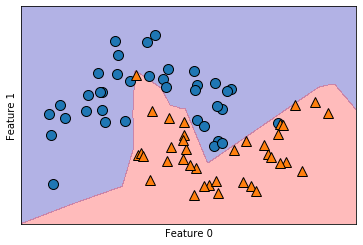

In [38]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10]).fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

plt.show()

使用2隐层，tanh

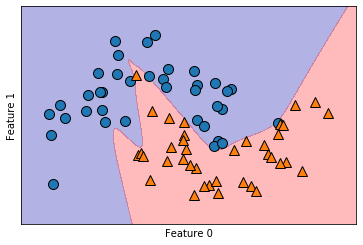

In [39]:
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    activation='tanh', hidden_layer_sizes=[10, 10]).fit(X_train, y_train)

mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

plt.show()

不同正则化（L2）参数下的效果

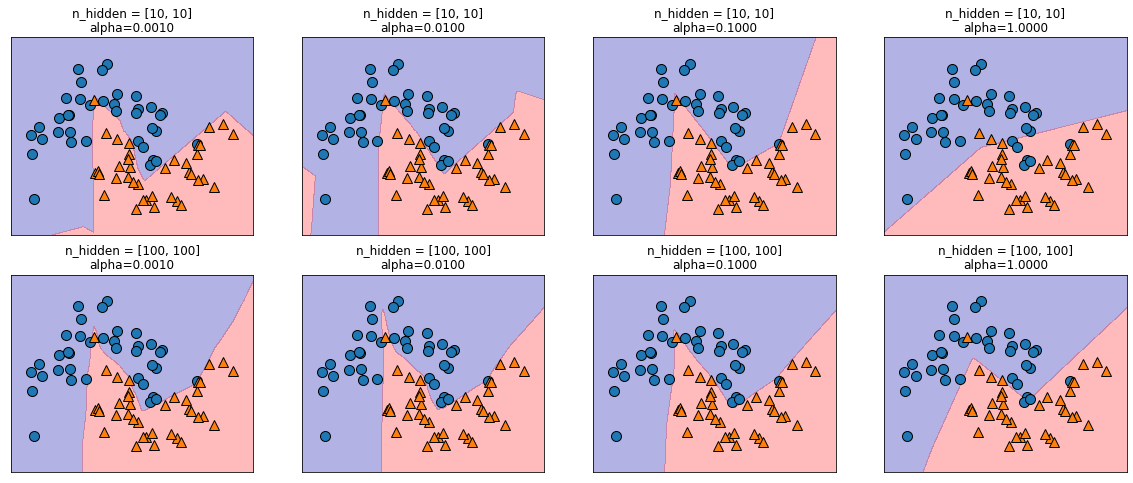

In [40]:
fig, axes = plt.subplots(2, 4, figsize=(20,8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title('n_hidden = [{n}, {n}]\nalpha={alpha:.4f}'.format(n=n_hidden_nodes, alpha=alpha))

plt.show()

不同初始化参数下的效果

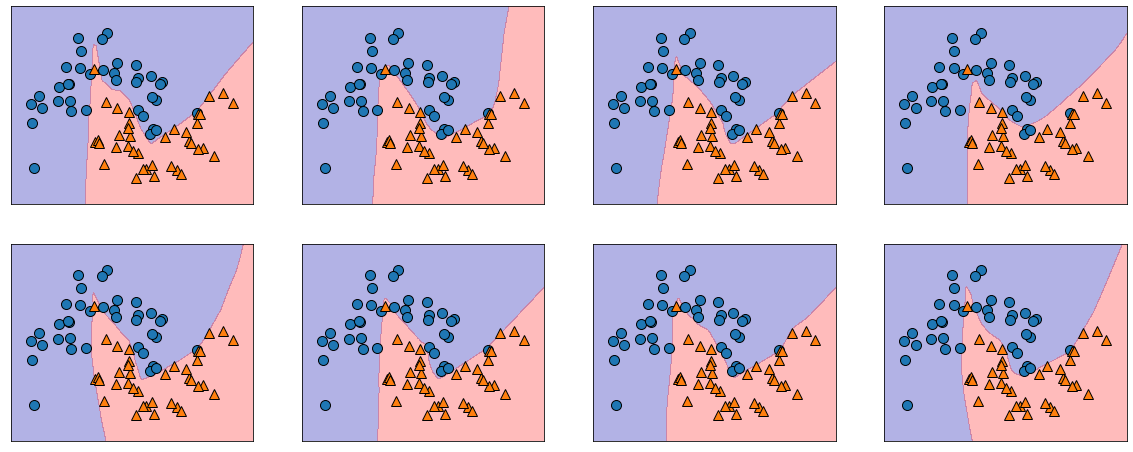

In [42]:
fig, axes = plt.subplots(2, 4, figsize=(20,8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i, hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3, ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:, 1], y_train, ax=ax)
plt.show()

### MLP分类乳腺癌数据

In [43]:
from sklearn.datasets import load_breast_cancer

canser = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(canser.data, canser.target, random_state=0)

mlp = MLPClassifier(random_state=0).fit(X_train, y_train)

print('Accuracy of training set:', mlp.score(X_train, y_train))
print('Accuracy on test set', mlp.score(X_test, y_test))

Accuracy of training set: 0.9272300469483568
Accuracy on test set 0.9300699300699301


数据集放缩

In [45]:
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.mean(axis=0)

X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0, max_iter=1000).fit(X_train_scaled, y_train)

print('Accuracy of training set:', mlp.score(X_train_scaled, y_train))
print('Accuracy on test set', mlp.score(X_test_scaled, y_test))

Accuracy of training set: 0.9929577464788732
Accuracy on test set 0.972027972027972


参数调整

In [54]:
mlp = MLPClassifier(random_state=0, max_iter=1000, alpha=1).fit(X_train_scaled, y_train)

print('Accuracy of training set:', mlp.score(X_train_scaled, y_train))
print('Accuracy on test set', mlp.score(X_test_scaled, y_test))

Accuracy of training set: 0.9812206572769953
Accuracy on test set 0.972027972027972


查看参数权重

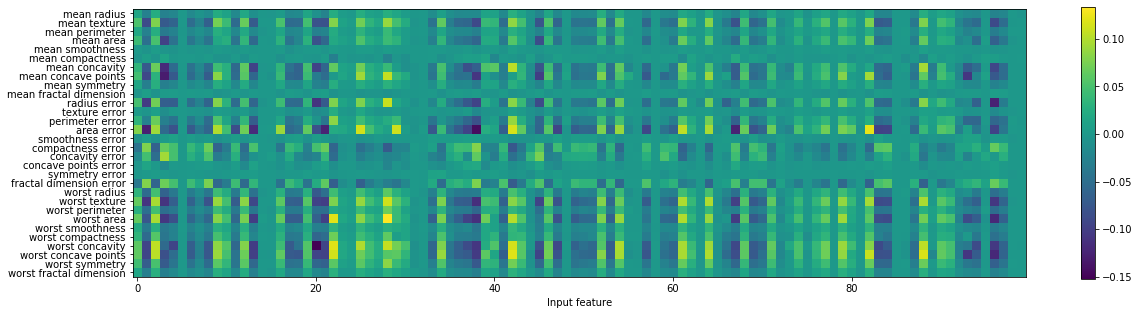

In [65]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), canser.feature_names)
plt.xlabel('Colums in weight matrix')
plt.xlabel('Input feature')
plt.colorbar()
plt.show()